<a href="https://colab.research.google.com/github/Lis30/Homeworks/blob/main/%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_4_1_%D0%9A%D0%B0%D1%80%D0%BF%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

1) В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:<br>
'df has y rows and x columns'<br>
где y – число строк, а x – число колонок.

In [ ]:
df = pd.read_csv('taxi_peru.csv', sep = ';')

In [ ]:
df_shape = f'df has {df.shape[0]} rows and {df.shape[1]} columns'
df_shape

'df has 23111 rows and 19 columns'

2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения. Например, для такого датафрэйма:<br> task2_1.png (в папке)<br>
Ответ будет: task2_2.png (в папке)<br>

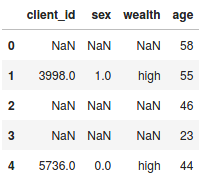

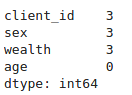

In [ ]:
na_number = df.isna().sum()

3) Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [ ]:
df_types = df.dtypes

4) Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

In [ ]:
df['age'] = df['age'].astype(int)

5) Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

In [ ]:
df = df.drop(['sex', 'age'], axis= 1 , inplace= True )

6) А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.

In [ ]:
df = df.drop_duplicates(['client_id'])

7) Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.<br>
Например,<br>
numbers = [1, -2, 3, 0, -3, 2]<br>
Тогда positive_numbers должен быть:<br>
positive_numbers = [1, 3]

In [ ]:
def pos(num):
    positive_numbers = []
    for i in num:
        if i == 0:
            break
        if i > 0:
            positive_numbers.append(i)
    return positive_numbers

numbers = [1, -2, 3, 0, -3, 2]
print(pos(numbers))

[1, 3]


8) Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!<br>
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. <br>
Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime().<br>
Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [ ]:
taxi = pd.read_csv('taxi_peru.csv', sep = ';')

In [ ]:
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

In [ ]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

9) ⭐️Задание со звёздочкой!⭐️
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')

In [ ]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at)/pd.Timedelta(minutes=1)
# .astype('timedelta64[m]') выдаёт ошибку, т.к. изначально даты конвертировались в [ns], чтобы перевести в минуты,
#разделила на минуту

9.1) ⭐️Задание со звёздочкой!⭐️<br>
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [ ]:
taxi.query('start_type == "reserved" and wait_time > 0').\
                        groupby('driver_id').\
                        agg({'wait_time': 'count'}).\
                        sort_values('wait_time', ascending=False).\
                        head(1)

,wait_time
driver_id,
406921adcca37705ef527b4246c0cfea,67


10) Подумайте, что может влиять на число опозданий из прошлого задания

In [ ]:
taxi.query('driver_id == "406921adcca37705ef527b4246c0cfea"').agg({'journey_id': 'count'})

journey_id    1075
dtype: int64

In [ ]:
taxi.driver_id.value_counts()

driver_id
c814db2127582cf95dea1f74f43127c2    1523
d665fb9f75ef5d9cd0fd89479380ba78    1225
ff5c924e0b630fd7c019a4234059fdf4    1111
406921adcca37705ef527b4246c0cfea    1075
ec84a73745199ff840ecafcb924383ad     974
                                    ... 
b3ba9cda1b124b4fdc5d639f2416a9ca       1
a8c74399632ec313e9e79e1a30538570       1
af07f9929390d66edf63ab7ee480273c       1
ab90a1bf4289d96e78d4a47d7cc2cd22       1
bf0f0845b5094fda2fcdac195ece97ad       1
Name: count, Length: 168, dtype: int64

Этот водитель - четвёртый по количеству поездок из всей базы, скорее всего, количество опозданий связано с большим количеством поездок (отношение кол-ва поездок с опозданием к общему кол-ву его поездок - 67 / 1075 = 6,23%)

11) ⭐️Задание со звёздочкой!⭐️<br>
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели.

In [ ]:
taxi['month'] = pd.DatetimeIndex(taxi.start_at).month
taxi['weekday'] = pd.DatetimeIndex(taxi.start_at).day_name()
taxi.head(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday


12) ⭐️Задание со звёздочкой!⭐️<br>
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина.<br>
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8).

<Axes: xlabel='month'>

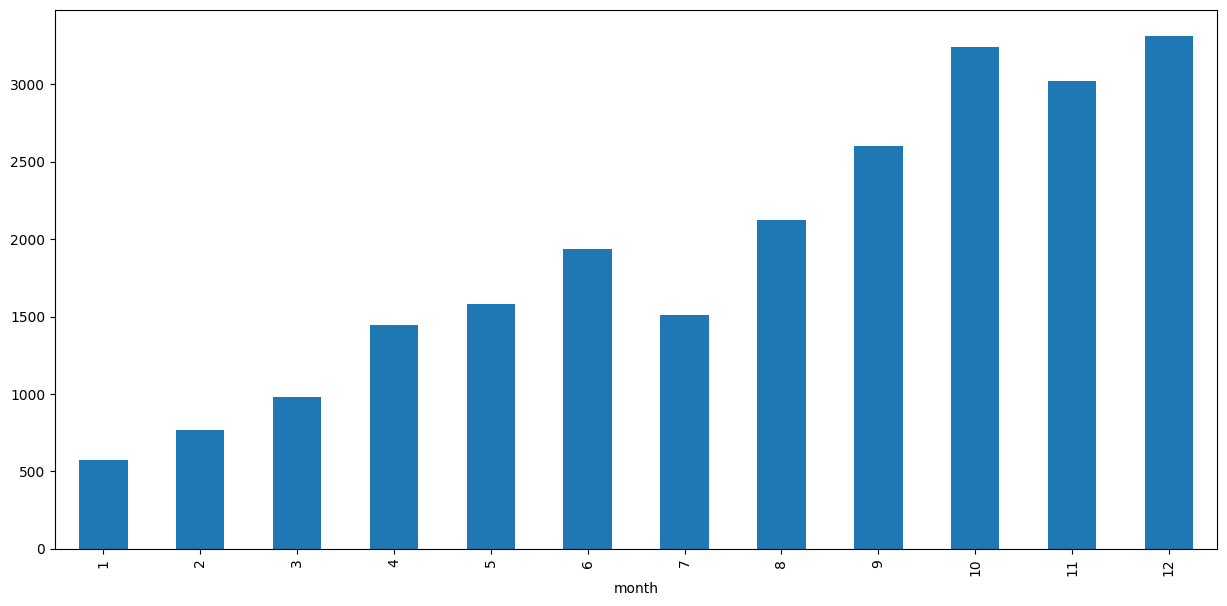

In [91]:
taxi.month.value_counts().sort_index().plot(kind='bar',figsize=(15,7))


распределение похоже, что компания только вышла на рынок, либо применила какую-то рекламную активность

13) ⭐️Задание со звёздочкой!⭐️<br>
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке.<br> Например: <br>
sns.countplot(data['column'], order=['One', 'Two', 'Three'])<br>
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

<Axes: xlabel='weekday'>

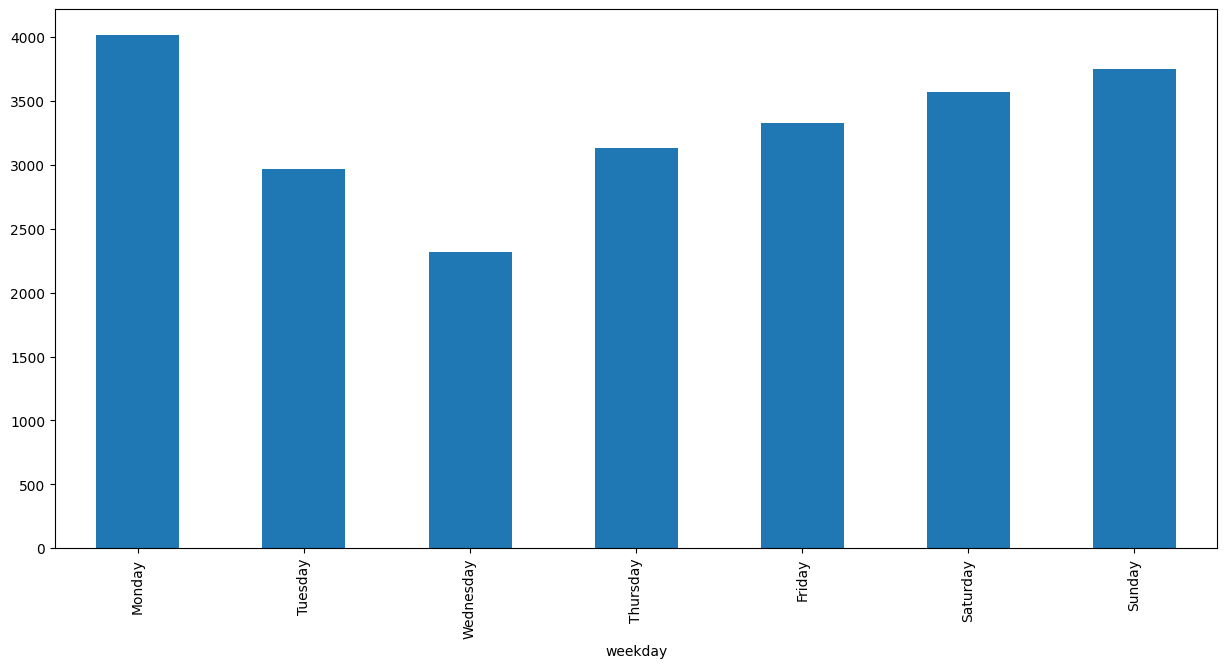

In [103]:
taxi_week = taxi.weekday.value_counts()
map_day = {'Monday': 1,
            'Tuesday': 2,
            'Wednesday': 3,
            'Thursday': 4,
            'Friday': 5,
            'Saturday': 6,
            'Sunday': 7}
taxi_week = taxi_week.reindex(index=sorted(taxi_week.index, key=lambda x: map_day[x]))
taxi_week.plot(kind='bar',figsize=(15,7))

Меньше всего заказов было в среду

14) ⭐️Задание со звёздочкой!⭐️<br>
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:<br>
DAU (daily active users) – число уникальных пользователей за день<br>
WAU (weekly active users) – число уникальных пользователей за неделю<br>
MAU (monthly active users) – число уникальных пользователей за месяц<br>
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения. <br>
Могут пригодиться:<br>
groupby – группировка<br>
nunique – число уникальных значений<br>
plot.line – линейная диаграмма

In [106]:
mau = taxi.groupby('month', as_index=False).agg({'user_id': 'nunique'})
mau

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


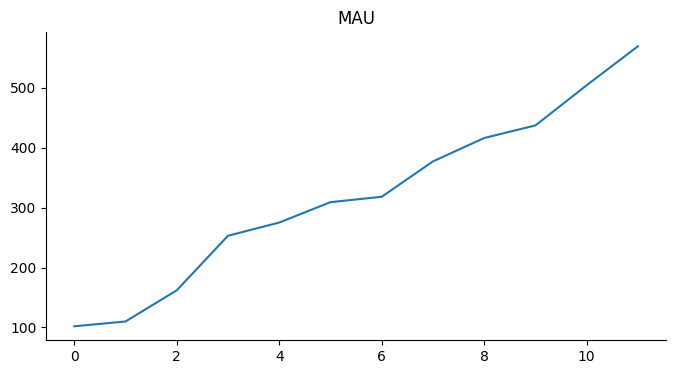

In [108]:
# @title MAU

from matplotlib import pyplot as plt
mau['user_id'].plot(kind='line', figsize=(8, 4), title='MAU')
plt.gca().spines[['top', 'right']].set_visible(False)